### Introduction

<p>This exercise is to build the best classifier to classifies "Quote_Flag" and trained under 
dataset provided as Assignment3-TrainingData.csv. The trained model will be validated using 
Assignment3-UnknownData.csv and Assignment3-Kaggle-Submission-Random-Sample.csv </p>

This assignment splits into 3 parts, data mining and data processing, validating different classification models and select the best classification model.

##### Data Processing and Data mining

###### Data mining problem - drop Personal_Info1 and Personal_Info5

    I will drop rows where Personal_Info1 and Personal_Info5 values are missing, since it null value has no means on this analytics assignment
   
######  Data prcessing problem - normalization Sale_Info5

    Since the data figure are vary hugely, MinMaxScaler is used to smooth the data and reduce the noise.
<br>

######  Data prcessing - encoding 
Categorical features are being encoded, as input of classifier. Field_Info1, Field_Info4, Coverage_Info3, Sales_Info4, Personal_Info1, Personal_Info3, Property_Info1, Property_Info3, Property_Info5, Geographic_Info4 and Geographic_Info5 are 

<br>

##### Cross Validation of different models and visualizing result 

Cross Validation for 3 diferent models - Decision Tree, Randomforest and kNN (Split for 10 folds)
    
    The cross validation will validate 3 models to compare with three models. The original plan was to include Support Vector Classification, yet it has a serious performance issue when dealing with too many features.
<br>

###### Models and parameter adjustment

Decision Tree 
    
    Decision Tree will be testing with 10 folds, and produce a score table.
    
Random Forest Classification (RFC)

    RFC will list 30 trees, 40 trees, 50 trees to compare which is the best number of trees

k-nearest neighbors algorithm (kNN )
    
    First of all, Elbow method is being used for seeking the optimum number of neighbors. The Comparsion will be shown as increased number of neighbors.

Support Vector Classification (SVC)
    
    Due to performance issue, SVC have only applied to 1 fold of training and testing for the score. 

###### Display  and visulisaize data and finding 
    
    THe First three models, Decision Tree, Random Forest Classification and k-nearest neighbours, undergoes a cross validation of 10 folds and form a table to display the scores in different folds. Heatmap is going to be shown for visulising the highest to lowest score in colour.
    

In [1]:
import pandas as pd
import numpy as np

In [2]:
PATH = '~/local_workplace/schworks/32130_funDataAna/assignment/a3_data_mining/Assignment3-TrainingData.csv'
UNKNOWN_PATH = '~/local_workplace/schworks/32130_funDataAna/assignment/a3_data_mining/Assignment3-UnknownData.csv'
RANDOM_PATH = '~/local_workplace/schworks/32130_funDataAna/assignment/a3_data_mining/Assignment3-Kaggle-Submission-Random-Sample.csv'

df = pd.read_csv(PATH)
X_validate_set = pd.read_csv(UNKNOWN_PATH).drop(columns=['Quote_Id', 'Quote_Date'])
y_validate_set = pd.read_csv(RANDOM_PATH)

#### Data propcessing
1. Drop empty rows of 
    a. Personal_Info1
    b. Personal_Info5
    
2. Processing Sales_info5 
        Since the data figure are vary hugely, to increase predictiability with normalized data
3. Label the features
4. Drop unnecessary Columns Quote_Flag - target, Quote_Date.
5. Drop missing value rows, since missing value doesn't provide information

In [3]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
scaler = MinMaxScaler()

sales_info5 = df['Sales_info5'].astype(np.float64).values.reshape(-1,1)

df['Sales_info5'] = scaler.fit_transform(sales_info5)

df = df.dropna(subset=['Personal_info5', 'Personal_info1'])
# Drop irrelvant Column for Dtree CLassifier
df = df.drop(columns=['Quote_Id','Quote_Date'])
X = df.drop('Quote_Flag', axis='columns')
y = df['Quote_Flag']
# inputs.columns

In [5]:
label_Field1 = LabelEncoder()
label_Field4 = LabelEncoder()
label_Coverage3 = LabelEncoder()
label_Sales4 = LabelEncoder()
label_Personal1 = LabelEncoder()
label_Personal3 = LabelEncoder()
label_Property1 = LabelEncoder()
label_Property3 = LabelEncoder()
label_Property5 = LabelEncoder()
label_Geographic4 = LabelEncoder()
label_Geographic5 = LabelEncoder()

X['Field1_n'] = label_Field1.fit_transform(X['Field_info1'])
X['Field3_n'] = label_Field1.fit_transform(X['Field_info3'])
X['Field4_n'] = label_Field4.fit_transform(X['Field_info4'])
X['Coverage3_n'] = label_Coverage3.fit_transform(X['Coverage_info3'])
X['Sales4_n'] = label_Sales4.fit_transform(X['Sales_info4'])
X['Personal1_n'] = label_Personal1.fit_transform(X['Personal_info1'])
X['Personal3_n'] = label_Personal3.fit_transform(X['Personal_info3'])
X['Property1_n'] = label_Property1.fit_transform(X['Property_info1'])
X['Property3_n'] = label_Property3.fit_transform(X['Property_info3'])
X['Property5_n'] = label_Property5.fit_transform(X['Property_info5'])
X['Geographic4_n'] = label_Geographic4.fit_transform(X['Geographic_info4'])
X['Geographic5_n'] = label_Geographic5.fit_transform(X['Geographic_info5'])

X = X.drop([
    'Field_info1',
    'Field_info3',
    'Field_info4',
    'Coverage_info3',
    'Sales_info4',
    'Personal_info1',
    'Personal_info3',
    'Property_info1',
    'Property_info3',
    'Property_info5',
    'Geographic_info4',
    'Geographic_info5'
], axis='columns')

#### K-Fold cross validation for 3 models 
> Stratified k-fold with 10 folds <br>
> > Stratified K-fold ensure each fold of dataset has the same proportion of observations with a given label. 

In [6]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [7]:
folds = StratifiedKFold(n_splits=10)

In [8]:
trees_kfold = cross_val_score(tree.DecisionTreeClassifier(criterion='entropy'), X, y, cv=folds)

In [9]:
rfc30_kfold = cross_val_score(RandomForestClassifier(oob_score=True, n_estimators=30, max_features="auto"), X, y, cv=folds)
rfc40_kfold = cross_val_score(RandomForestClassifier(oob_score=True, n_estimators=40, max_features="auto"), X, y, cv=folds)
rfc50_kfold = cross_val_score(RandomForestClassifier(oob_score=True, n_estimators=50, max_features="auto"), X, y, cv=folds)
rfc60_kfold = cross_val_score(RandomForestClassifier(oob_score=True, n_estimators=60, max_features="auto"), X, y, cv=folds)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))


#### Visualize Elbow method for Number of Neighbors
The Elbow method is use for picking the elbow point of the chart, which is around 2 to 3 number of neighbors.

Text(0, 0.5, 'Error Rate')

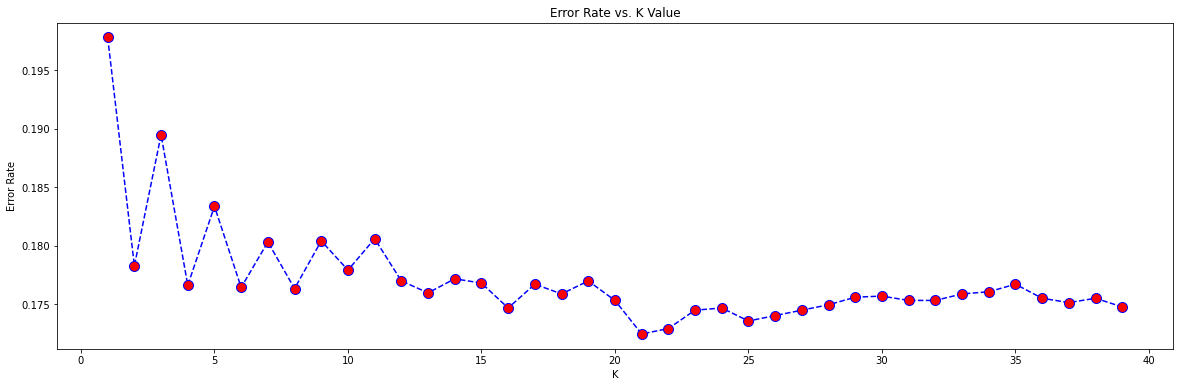

In [13]:
plt.figure(figsize=(20,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
# svc10_kfold

In [14]:
kNN2_kfold = cross_val_score(KNeighborsClassifier(n_neighbors = 2), X, y, cv=folds)
kNN4_kfold = cross_val_score(KNeighborsClassifier(n_neighbors = 4), X, y, cv=folds)

#### Cross Validation results
The Table has 7 columns, which are Decision Tree using entropy, Random Forest that has 30, 40, 50 and 60 trees, and kNN has 2 neighbours and 4 neighbours. The high scores are concentrated in random forest tree classifications.

In [15]:
model_data = {'Decision_Tree' : trees_kfold,
             'Random_Forest_30_Trees' : rfc30_kfold,
             'Random_Forest_40_Trees' : rfc40_kfold,
             'Random_Forest_50_Trees' : rfc50_kfold,
             'Random_Forest_60_Trees' : rfc60_kfold,
             'kNN_with_2_Neigbour' : kNN2_kfold,
             'kNN_with_4_Neigbour' : kNN4_kfold}
df= pd.DataFrame(model_data)
df

,Decision_Tree,Random_Forest_30_Trees,Random_Forest_40_Trees,Random_Forest_50_Trees,Random_Forest_60_Trees,kNN_with_2_Neigbour,kNN_with_4_Neigbour
0,0.810250,0.853874,0.848383,0.853874,0.853874,0.817572,0.810860
1,0.817821,0.861153,0.855661,0.859628,0.858407,0.822399,0.823924
2,0.821788,0.856271,0.859017,0.857492,0.860543,0.822704,0.820873
3,0.809887,0.854440,0.850168,0.860848,0.859017,0.816295,0.816906
4,0.820568,0.845896,0.849558,0.846506,0.849558,0.811413,0.805615
5,0.812023,0.850473,0.849252,0.846506,0.853219,0.820262,0.824535
6,0.822399,0.864510,0.863595,0.861153,0.858407,0.820873,0.820568
7,0.837046,0.861764,0.864815,0.862679,0.860238,0.834605,0.827891
8,0.837046,0.865121,0.866341,0.868172,0.870003,0.827281,0.821788
9,0.840403,0.874580,0.873055,0.870308,0.875191,0.826976,0.824535


#### Visualising Score Table by Heat map
The heatmap is to visualise the result of cross validation scores. The bright area means that classification has higher score. Most of the high score classifications are located in Random forest classification columns.

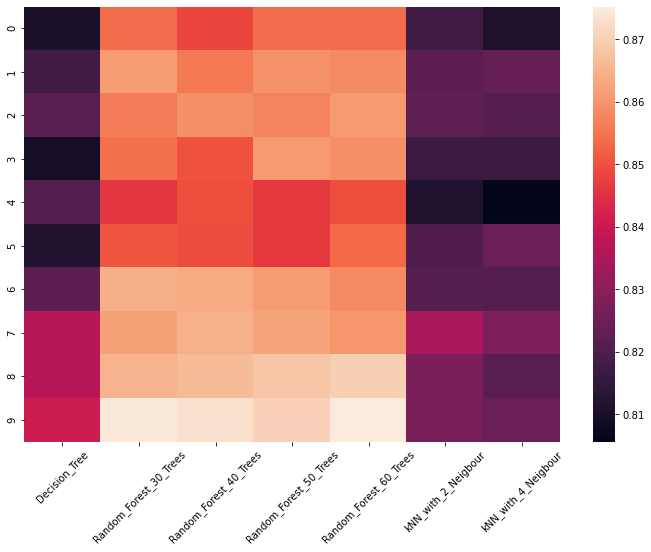

In [16]:
fig_dims = (12, 8)
fig, ax = plt.subplots(figsize=fig_dims)
heatmap = sns.heatmap(df,ax=ax)
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45)
# , yticklabels=5
plt.show()

##### Support Vector Classification
Since Regularization will affect SVC Model's tolerance of prediction error, it is, however, to reduce overfit to the training model


#### Support Vector Classification
> The regularization parameter (lambda) serves as a degree of importance that is given to misclassifications. High regularization means higher tolerance of classification as the parameter of C. It could reduce the chance of over-fitting.


In [17]:
from sklearn.svm import SVC

In [18]:
svc_5 = SVC(C=5)
svc_5.fit(X_train, y_train)
svc_5_score = svc_5.score(X_test, y_test)
svc_5_pred = svc_5.decision_function(X_test)

In [19]:
svc_10 = SVC(C=10)
svc_10.fit(X_train, y_train)
svc_10_score = svc_10.score(X_test, y_test)
svc_10_pred = svc_10.predict(X_test)

In [20]:
svc_15 = SVC(C=15)
svc_15.fit(X_train, y_train)
svc_15_score = svc_15.score(X_test, y_test)
svc_15_pred = svc_15.predict(X_test)

In [21]:
svc_20 = SVC(C=20)
svc_20.fit(X_train, y_train)
svc_20_score = svc_20.score(X_test, y_test)
svc_20_pred = svc_20.predict(X_test)

In [22]:
svc_25 = SVC(C=25)
svc_25.fit(X_train, y_train)
svc_25_score = svc_25.score(X_test, y_test)
svc_25_pred = svc_25.predict(X_test)

In [23]:
svc_30 = SVC(C=30)
svc_30.fit(X_train, y_train)
svc_30_score = svc_30.score(X_test, y_test)
svc_30_pred = svc_30.predict(X_test)

In [35]:
svc_C_Comparsion = [svc_5_score,svc_10_score,svc_15_score,svc_20_score,svc_25_score,svc_30_score]

#### Evaluation on Support Vector Classification

In general, Support Vector Classifications score are lower than 83, alike of decision tree and kNN.

In [37]:
data = {
    'SVC regularization Level' : [5, 10, 15, 20, 25, 30],
    'Scores' : svc_C_Comparsion
}
df_svc_scores = pd.DataFrame(data)
df_svc_scores

,SVC regularization Level,Scores
0,5,0.819787
1,10,0.823763
2,15,0.825335
3,20,0.826167
4,25,0.827277
5,30,0.828664


##### Evaluating Models using ROC and AUC

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has AUC near to the 0 which means it has the worst measure of separability. The model will not be useful when AUC is 0.5. 

<br>

Random Forest classification has slight better score than Decision Tree, which is 0.706 in auc. In contrast, kNN and SVC are below 0.6 in auc.

In [26]:
from sklearn.metrics import roc_curve, auc

In [27]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
dt = tree.DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

rfc = RandomForestClassifier(oob_score=True, n_estimators=50, max_features="auto")
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
oob_score = rfc.oob_score_
print(f'oob score {oob_score}')

kNN = KNeighborsClassifier(n_neighbors = 2)
kNN.fit(X_train, y_train)
kNN_pred = kNN.predict(X_test)

oob score 0.8491528511568591


In [28]:
dt_fpr, dt_tpr, threshold = roc_curve(y_test, dt_pred)
auc_dt = auc(dt_fpr, dt_tpr)

rfc_fpr, rfc_tpr, threshold = roc_curve(y_test, rfc_pred)
auc_rfc = auc(rfc_fpr, rfc_tpr)

kNN_fpr, kNN_tpr, threshold = roc_curve(y_test, kNN_pred)
auc_kNN = auc(kNN_fpr, kNN_tpr)

svc_10_fpr, svc_10_tpr, threshold = roc_curve(y_test, svc_10_pred)
auc_svc_10 = auc(svc_10_fpr, svc_10_tpr)


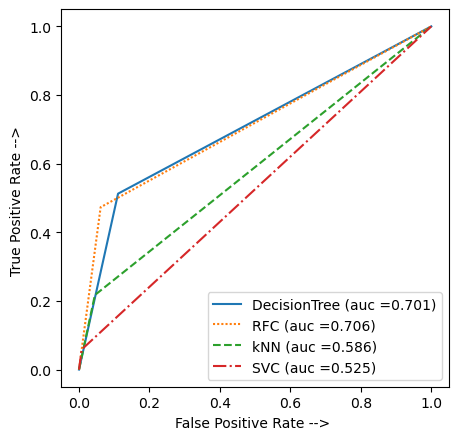

In [29]:
plt.figure(figsize=(5,5), dpi=100)

plt.plot(dt_fpr, dt_tpr, linestyle='-', label='DecisionTree (auc =%0.3f)' % auc_dt)
plt.plot(rfc_fpr, rfc_tpr, linestyle= (0, (1, 1)), label='RFC (auc =%0.3f)' % auc_rfc)
plt.plot(kNN_fpr, kNN_tpr, linestyle='--', label='kNN (auc =%0.3f)' % auc_kNN)
plt.plot(svc_10_fpr, svc_10_tpr, linestyle='-.', label='SVC (auc =%0.3f)' % auc_svc_10)

# densely dashdotted
plt.xlabel('False Positive Rate --> ')
plt.ylabel('True Positive Rate --> ')

plt.legend()

plt.show()

#### Selecting a Classification 

Since Random Forest Classification has better scores in different aspect than other models, the predictability and Area Under The Curve, thus, Random Forest Classification is being selected for the classifier

In [30]:
label_Field1_v = LabelEncoder()
label_Field3_v = LabelEncoder()
label_Field4_v = LabelEncoder()
label_Coverage3_v = LabelEncoder()
label_Sales4_v = LabelEncoder()
label_Personal1_v = LabelEncoder()
label_Personal3_v = LabelEncoder()
label_Property1_v = LabelEncoder()
label_Property3_v = LabelEncoder()
label_Property5_v = LabelEncoder()
label_Geographic4_v = LabelEncoder()
label_Geographic5_v = LabelEncoder()

X_validate_set['Field1_n'] = label_Field1_v.fit_transform(X_validate_set['Field_info1'])
X_validate_set['Field3_n'] = label_Field3_v.fit_transform(X_validate_set['Field_info3'])
X_validate_set['Field4_n'] = label_Field4_v.fit_transform(X_validate_set['Field_info4'])
X_validate_set['Coverage3_n'] = label_Coverage3_v.fit_transform(X_validate_set['Coverage_info3'])
X_validate_set['Sales4_n'] = label_Sales4_v.fit_transform(X_validate_set['Sales_info4'])
X_validate_set['Personal1_n'] = label_Personal1_v.fit_transform(X_validate_set['Personal_info1'])
X_validate_set['Personal3_n'] = label_Personal3_v.fit_transform(X_validate_set['Personal_info3'])
X_validate_set['Property1_n'] = label_Property1_v.fit_transform(X_validate_set['Property_info1'])
X_validate_set['Property3_n'] = label_Property3_v.fit_transform(X_validate_set['Property_info3'])
X_validate_set['Property5_n'] = label_Property5_v.fit_transform(X_validate_set['Property_info5'])
X_validate_set['Geographic4_n'] = label_Geographic4_v.fit_transform(X_validate_set['Geographic_info4'])
X_validate_set['Geographic5_n'] = label_Geographic5_v.fit_transform(X_validate_set['Geographic_info5'])

X_validate_set = X_validate_set.drop([
    'Field_info1',
    'Field_info3',
    'Field_info4',
    'Coverage_info3',
    'Sales_info4',
    'Personal_info1',
    'Personal_info3',
    'Property_info1',
    'Property_info3',
    'Property_info5',
    'Geographic_info4',
    'Geographic_info5'
], axis='columns')


In [31]:
s_info5 = X_validate_set['Sales_info5'].astype(np.float64).values.reshape(-1,1)
X_validate_set['Sales_info5'] = scaler.fit_transform(s_info5)
X_validate_set = X_validate_set.fillna(0)

In [38]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [39]:
unknown_set_pred = rfc.predict(X_validate_set)

In [40]:
rfc.score(X_validate_set, y_validate_set.Quote_Flag)

0.7108410632535174

In [43]:
print(classification_report(y_validate_set.Quote_Flag, unknown_set_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82     33820
           1       0.19      0.16      0.17      7901

    accuracy                           0.71     41721
   macro avg       0.50      0.50      0.50     41721
weighted avg       0.69      0.71      0.70     41721



#### confusion_matrix

The True positive prediction is 28404 

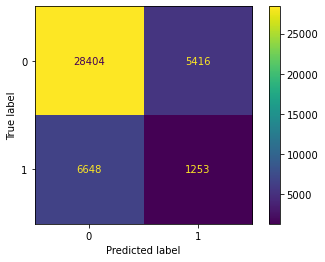

In [44]:
plot_confusion_matrix(rfc, X_validate_set, y_validate_set.Quote_Flag)

#### Reflection 
My first attempt of data mining was to find out the correlation between features. Unfortunately, there is no meaningful correlations found. The second approach is to smooth any feature that is very extreme, thus, Sale_info5 is being normalized with MinMax scaler.

<br>

There are numerous way to classifiy a dataset, all of them have different approach and features that suit centain kind of dataset. Random forest and Decision Tree are the best candidate for this dataset after different classification is being scored.

<br>

Visualization data assist my process of finding the best classification in this assignment.